In [2]:
%matplotlib inline

from IPython.display import Image
from IPython.core.pylabtools import figsize, getfigs

# imports basicos
import numpy as np
import scipy as sp
import pandas as pd
import pylab as pl
# http://matplotlib.org/api/pyplot_api.html
import matplotlib.pyplot as plt
import math
import sys
import traceback

# seaborn
# import seaborn as sns
# sns.set()

# from pandas.io.pytables import HDFStore

figsize(11, 9)
plt.style.use('ggplot')
pd.set_option('display.max_columns',300)
pd.set_option('display.width', 4000)
# plt.xkcd()  # Yes...

#needed to render in notebook


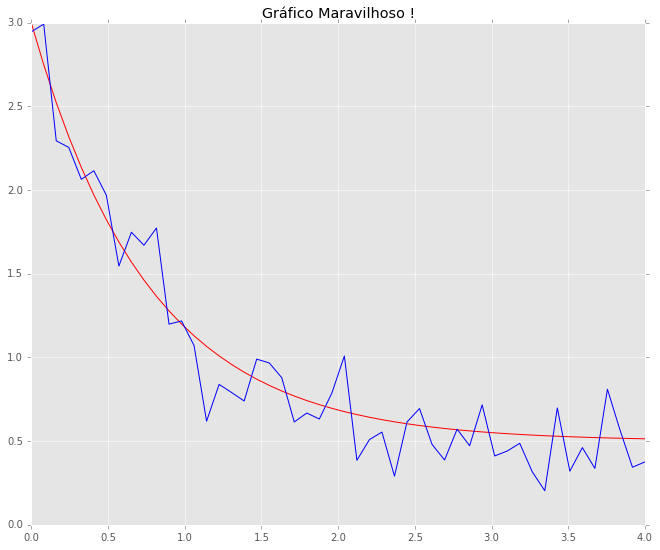

In [3]:
def func(x, a, b, c):
    return a*np.exp(-b*x) + c

x = np.linspace(0,4,50)
y = func(x, 2.5, 1.3, 0.5)
yn = y + 0.2*np.random.normal(size=len(x))

plt.figure()
plt.plot(x,y,"r-")
plt.plot(x,yn,"b-")
plt.title(u'Gráfico Maravilhoso !')
plt.show()

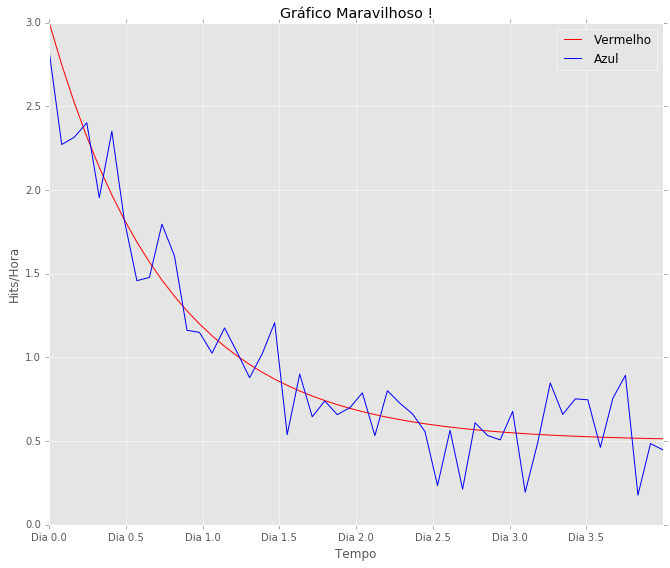

In [17]:
def func(x, a, b, c):
    return a*np.exp(-b*x) + c

x = np.linspace(0,4,50)
y = func(x, 2.5, 1.3, 0.5)
yn = y + 0.2*np.random.normal(size=len(x))

plt.figure()
plt.plot(x,y,"r-", label='Vermelho')
plt.plot(x,yn,"b-", label='Azul')
# plt.scatter(x,y,alpha=0.3)

plt.title('Gráfico Maravilhoso !'.decode('utf-8'))
plt.xlabel("Tempo")
plt.ylabel("Hits/Hora")
plt.xticks([t/2.0 for t in range(0,8)], ['Dia {}'.format(w/2.0) for w in range(0,8)])
# plt.autoscale(tight=True)
# plt.grid()

plt.legend(loc=0)  # best->0 upper right->1 upper left->2 lower left->3 lower right->4 
plt.show()

In [ ]:
from matplotlib import pyplot
from numpy import arange
import bisect

def scatterplot(x,y):
    pyplot.plot(x,y,'b.')
    pyplot.xlim(min(x)-1,max(x)+1)
    pyplot.ylim(min(y)-1,max(y)+1)
    pyplot.show()

def barplot(labels,data):
    pos=arange(len(data))
    pyplot.xticks(pos+0.4,labels)
    pyplot.bar(pos,data)
    pyplot.show()

def histplot(data,bins=None,nbins=5):
    minx,maxx=min(data),max(data)
    space=(maxx-minx)/float(nbins)
    if not bins: bins=arange(minx,maxx,space)
    binned=[bisect.bisect(bins,x) for x in data]
    l=['%.1f'%x for x in list(bins)+[maxx]] if space<1 else [str(int(x)) for x in list(bins)+[maxx]]
    displab=[x+'-'+y for x,y in zip(l[:-1],l[1:])]
    barplot(displab,[binned.count(x+1) for x in range(len(bins))])

def barchart(x,y,numbins=5):
    datarange=max(x)-min(x)
    bin_width=float(datarange)/numbins
    pos=min(x)
    bins=[0 for i in range(numbins+1)]

    for i in range(numbins):
        bins[i]=pos
        pos+=bin_width
    bins[numbins]=max(x)+1
    binsum=[0 for i in range(numbins)]
    bincount=[0 for i in range(numbins)]
    binaverage=[0 for i in range(numbins)]

    for i in range(numbins):
        for j in range(len(x)):
            if x[j]>=bins[i] and x[j]<bins[i+1]:
                bincount[i]+=1
                binsum[i]+=y[j]

    for i in range(numbins):
        binaverage[i]=float(binsum[i])/bincount[i]
    barplot(range(numbins),binaverage)

def piechart(labels,data):
    fig=pyplot.figure(figsize=(7,7))
    pyplot.pie(data,labels=labels,autopct='%1.2f%%')
    pyplot.show()

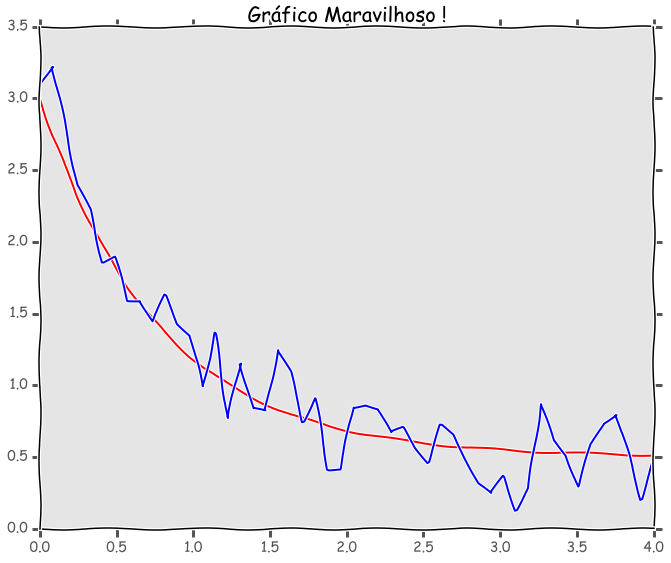

In [3]:
def func(x, a, b, c):
    return a*np.exp(-b*x) + c

x = np.linspace(0,4,50)
y = func(x, 2.5, 1.3, 0.5)
yn = y + 0.2*np.random.normal(size=len(x))

with plt.xkcd():
    plt.figure()
    plt.plot(x,y,"r-")
    plt.plot(x,yn,"b-")
    plt.title(u'Gráfico Maravilhoso !')
    plt.show()

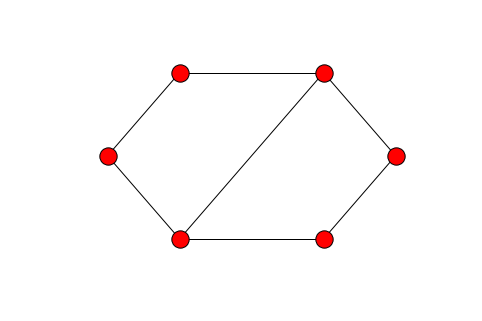

In [7]:
# conda install networkx

import networkx as nx
%matplotlib inline
        
import matplotlib.pyplot as plt

def draw_graph(graph):

    # extract nodes from graph
    nodes = set([n1 for n1, n2 in graph] + [n2 for n1, n2 in graph])

    # create networkx graph
    G=nx.Graph()

    # add nodes
    for node in nodes:
        G.add_node(node)

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    # draw graph
    pos = nx.shell_layout(G)
    nx.draw(G, pos)

    # show graph
    plt.show()

# draw example
graph = [(20, 21),(21, 22),(22, 23), (23, 24),(24, 25), (25, 20), (21,24)]
draw_graph(graph)

In [4]:
# pip install py2neo
from py2neo import Graph, Node
from scripts.vis import draw

graph = Graph()
graph.delete_all()

nicole = Node("Person", name="Nicole", age=24)
drew = Node("Person", name="Drew", age=20)

mtdew = Node("Drink", name="Mountain Dew", calories=9000)
cokezero = Node("Drink", name="Coke Zero", calories=0)

coke = Node("Manufacturer", name="Coca Cola")
pepsi = Node("Manufacturer", name="Pepsi")

graph.create(nicole | drew | mtdew | cokezero | coke | pepsi)


options = {"Person": "name", "Drink": "name", "Manufacturer": "name"}
# draw(graph, options)

from py2neo import Relationship

graph.create(Relationship(nicole, "LIKES", cokezero))
graph.create(Relationship(nicole, "LIKES", mtdew))
graph.create(Relationship(drew, "LIKES", mtdew))
graph.create(Relationship(coke, "MAKES", cokezero))
graph.create(Relationship(pepsi, "MAKES", mtdew))

draw(graph, options)



SocketError: Connection refused

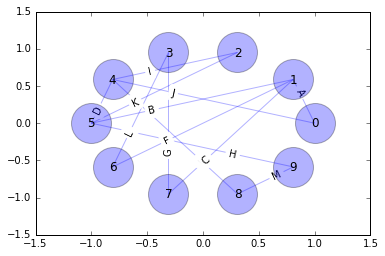

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(graph, labels=None, graph_layout='shell',
               node_size=1600, node_color='blue', node_alpha=0.3,
               node_text_size=12,
               edge_color='blue', edge_alpha=0.3, edge_tickness=1,
               edge_text_pos=0.3,
               text_font='sans-serif'):

    # create networkx graph
    G=nx.Graph()

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    # these are different layouts for the network you may try
    # shell seems to work best
    if graph_layout == 'spring':
        graph_pos=nx.spring_layout(G)
    elif graph_layout == 'spectral':
        graph_pos=nx.spectral_layout(G)
    elif graph_layout == 'random':
        graph_pos=nx.random_layout(G)
    else:
        graph_pos=nx.shell_layout(G)

    # draw graph
    nx.draw_networkx_nodes(G,graph_pos,node_size=node_size, 
                           alpha=node_alpha, node_color=node_color)
    nx.draw_networkx_edges(G,graph_pos,width=edge_tickness,
                           alpha=edge_alpha,edge_color=edge_color)
    nx.draw_networkx_labels(G, graph_pos,font_size=node_text_size,
                            font_family=text_font)

    if labels is None:
        labels = range(len(graph))

    edge_labels = dict(zip(graph, labels))
    nx.draw_networkx_edge_labels(G, graph_pos, edge_labels=edge_labels, 
                                 label_pos=edge_text_pos)

    # show graph
    plt.show()

graph = [(0, 1), (1, 5), (1, 7), (4, 5), (4, 8), (1, 6), (3, 7), (5, 9),
         (2, 4), (0, 4), (2, 5), (3, 6), (8, 9)]

# you may name your edge labels
labels = map(chr, range(65, 65+len(graph)))
draw_graph(graph, labels)

# if edge labels is not specified, numeric labels (0, 1, 2...) will be used
#draw_graph(graph)